# Predict Tweet Toxicity

In [110]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack

In [111]:
input_filename = "twitter_data/ian_scraped_tweets/st_daca_0117_0218"

In [112]:
df = pd.read_csv(input_filename, encoding = "ISO-8859-1",
                 usecols = ['date', 'fullname', 'id', 'likes', 'replies', 
                            'retweets', 'text', 'url', 'user', 'month'])

In [119]:
# drop NAs
df = df.dropna()

# drop duplicates
df = df.drop_duplicates()

### Vectorize tweets and predict toxicity with model

In [113]:
# Load vectorizers
word_vectorizer = pickle.load(open("models/word_vectorizer.pickle", "rb" ))
ngram_vectorizer = pickle.load(open("models/ngram_vectorizer.pickle", "rb" ))

In [114]:
# Vectorize tweets
tweet_word_features = word_vectorizer.transform(df['text'])
tweet_char_features = char_vectorizer.transform(df['text'])
tweet_features = hstack([tweet_word_features, tweet_char_features])

In [ ]:
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [115]:
# Load models
loaded_models = {}
for col in target_columns:
    loaded_models[col] = pickle.load(open('models/model_{}.sav'.format(col), "rb" ))

In [116]:
# Run models
for col in target_columns:
    df[col] = loaded_models[col].predict_proba(tweet_features)[:, 1]

In [117]:
df.head()

,date,fullname,id,likes,replies,retweets,text,url,user,month,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,2017-09-22 23:59:53,Jose,911379557739106305,0,0,0,Luther Strange Hides from DACA Amnesty Questio...,/JoseD89344985/status/911379557739106305,JoseD89344985,2017-09-01,0.009627,0.000128,0.000801,0.000023,0.001124,0.000017
1,2017-09-22 23:59:48,Step Up Louisiana,911379534578094081,1,0,0,Protect #DACA and #TPS. #NoBanNoWall,/StepUpLA/status/911379534578094081,StepUpLA,2017-09-01,0.000105,0.001084,0.000102,0.000020,0.000025,0.000198
2,2017-09-22 23:59:20,It's ok to be white,911379416269201408,0,0,0,Please don't end DACA we need more people like...,/Perspec16977759/status/911379416269201408,Perspec16977759,2017-09-01,0.001128,0.002139,0.001243,0.000026,0.000153,0.000017
3,2017-09-22 23:58:41,ale,911379256218763264,9,0,5,#DREAMERS in utah go to http://diversity.utah....,/flazedas/status/911379256218763264,flazedas,2017-09-01,0.005355,0.001445,0.000973,0.000039,0.001186,0.000069
4,2017-09-22 23:58:37,#DefendDACA Â âï¸Â ðºð¸,911379237982089217,2,0,0,Repealing DACA Will Have Big Consequences for ...,/defenddacatx/status/911379237982089217,defenddacatx,2017-09-01,0.000228,0.000744,0.000390,0.000024,0.000217,0.000030


In [30]:
df['classification'] = df[target_columns].idxmax(axis=1)
df['max_value'] = df[target_columns].max(axis=1)

NameError: name 'df' is not defined

In [91]:
# export df
export_filename = "classified_data/classified_something_tweets"
df.to_csv(export_filename)

### Visualizations

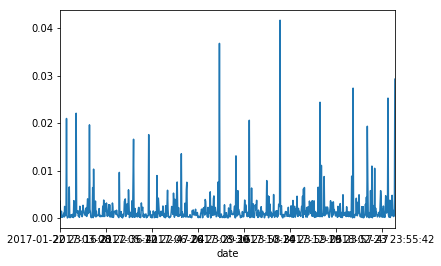

In [120]:
# visualize obscenity
df.groupby('date')['obscene'].mean().plot()

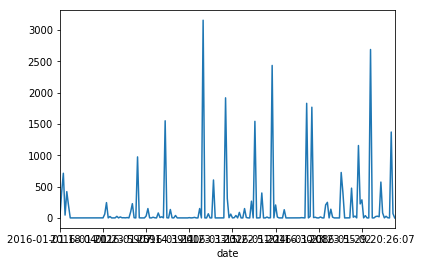

In [37]:
df['likes'] = df['likes'].astype(float)

# normalizing identity hate by tweet popularity
df['popular_obscene'] = df['obscene']*df['likes']
df.groupby('date')['popular_obscene'].mean().plot()

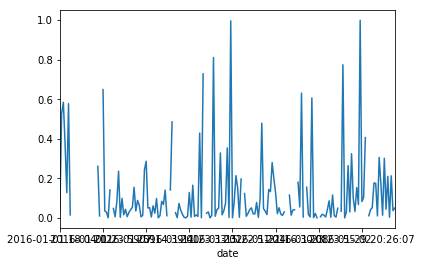

In [38]:
# normalizing identity hate by number of popular tweets
(df.groupby('date')['popular_obscene'].sum() / df.groupby('date')['likes'].sum()).plot()

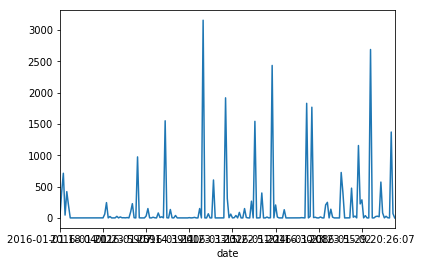

In [39]:
# normalizing popular tweets by number of popular tweets
(df.groupby('date')['popular_obscene'].sum() / df.groupby('date')['likes'].count()).plot()